In [0]:
# import relavant module
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib
import pylab
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Get data for stock index
stock_indexes=['^DJI','^GSPC','^RUT','^NDX', 'AAPL', 'MSFT', 'MPC', 'MMM']
def get_stock_indexes(stock_indexes,start,end):
   return web.get_data_yahoo(stock_indexes,'2000-01-01','2019-12-31')['Adj Close']
data = pd.DataFrame({n: get_stock_indexes(n, '2000-01-01','2019-12-31') for n in stock_indexes})

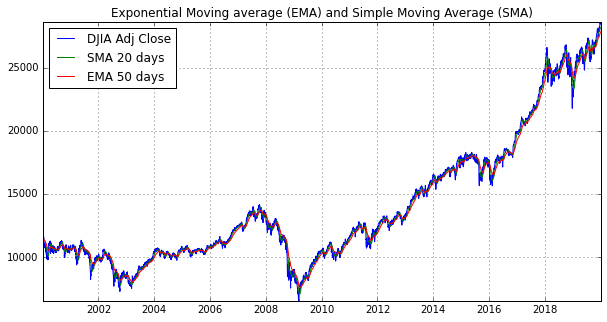

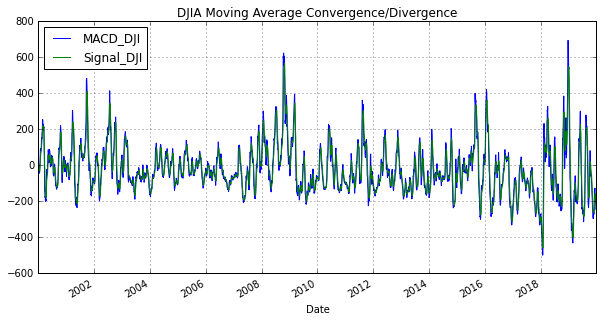

In [957]:
 #Moving averages(EMA and SMA) for ^DJI 
 data['SMA_20_DJI']=data.iloc[:,0].rolling(window=20).mean()
 data['EMA_50_DJI'] = data.iloc[:,0].ewm(span=50, adjust=False).mean()

 # Define Signal #When the value of the data series is greater than SMA then buy.
 data['trading_signal_SMA_DJI'] = np.where(data.iloc[:,0] > data['SMA_20_DJI'], 1, 0)
 data['trading_signal_EMA_DJI'] = np.where(data.iloc[:,0] > data['EMA_50_DJI'], 1, 0)
 plt.figure(figsize=[10,5])
 plt.plot(data.iloc[:,0],label='DJIA Adj Close')
 plt.plot(data['SMA_20_DJI'],label='SMA 20 days')
 plt.plot(data['EMA_50_DJI'],label='EMA 50 days')
 plt.grid(True)
 plt.axis('tight')
 plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')
 plt.legend(loc=2)


#Moving average convergence divergence strategy

# Calculate exponential moving average for DJI
data['12d_EMA_DJI'] = data.iloc[:,0].ewm(span=12).mean()
data['26d_EMA_DJI'] = data.iloc[:,0].ewm(span=26).mean()

#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_DJI'] = data['26d_EMA_DJI'] - data['12d_EMA_DJI']

# Calculate Signal
data['Signal_DJI'] = data.MACD_DJI.ewm(span=9).mean()
data[['MACD_DJI','Signal_DJI']].plot(figsize=(10,5))
plt.grid(True)
plt.title('DJIA Moving Average Convergence/Divergence')
plt.show()

# Define Signal #When the value of MACD series is greater than signal series then buy.
data['trading_signal_DJI'] = np.where(data['MACD_DJI'] > data['Signal_DJI'], 1, 0)

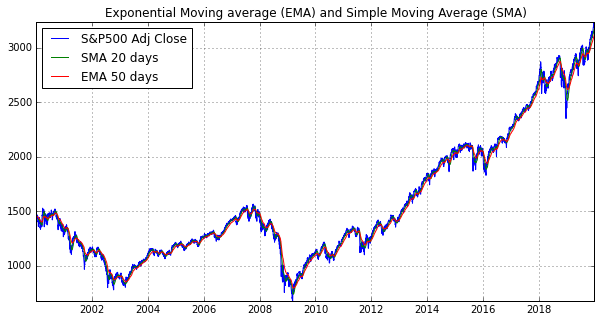

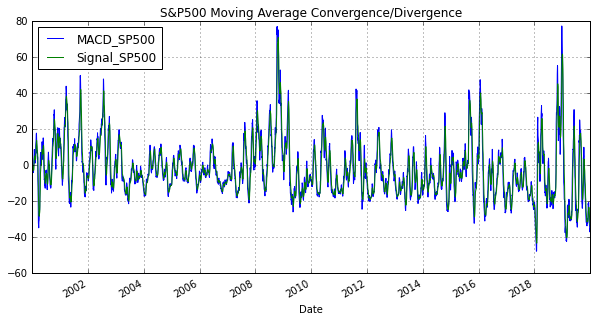

In [958]:
#Moving averages(EMA and SMA) for S&P 5000
data['SMA_20_SP500'] =data.iloc[:,1].rolling(window=20).mean()
data['EMA_50_SP500'] = data.iloc[:,1].ewm(span=50, adjust=False).mean()

 # Define Signal #When the value of the data series is greater than SMA then buy.
data['trading_signal_SMA_SP500'] = np.where(data.iloc[:,1] > data['SMA_20_SP500'], 1, 0)
data['trading_signal_EMA_SP500'] = np.where(data.iloc[:,1] > data['EMA_50_SP500'], 1, 0)
plt.figure(figsize=[10,5])
plt.plot(data.iloc[:,1],label='S&P500 Adj Close')
plt.plot(data['SMA_20_SP500'],label='SMA 20 days')
plt.plot(data['EMA_50_SP500'],label='EMA 50 days')
plt.grid(True)
plt.axis('tight')
plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')
plt.legend(loc=2)


#Moving average convergence divergence strategy

# Calculate exponential moving average for S&P500
data['12d_EMA_SP500'] = data.iloc[:,1].ewm(span=12).mean()
data['26d_EMA_SP500'] = data.iloc[:,1].ewm(span=26).mean()
#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_SP500'] = data['26d_EMA_SP500'] - data['12d_EMA_SP500']
# Calculate Signal
data['Signal_SP500'] = data.MACD_SP500.ewm(span=9).mean()
data[['MACD_SP500','Signal_SP500']].plot(figsize=(10,5))
plt.grid(True)
plt.title('S&P500 Moving Average Convergence/Divergence')
plt.show()

# Define Signal #When the value of MACD series is greater than signal series then buy.
data['trading_signal_SP500'] = np.where(data['MACD_SP500'] > data['Signal_SP500'], 1, 0)

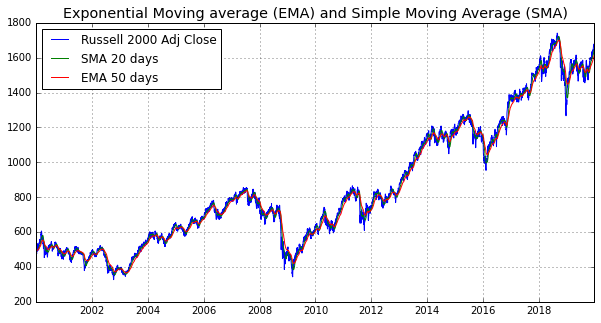

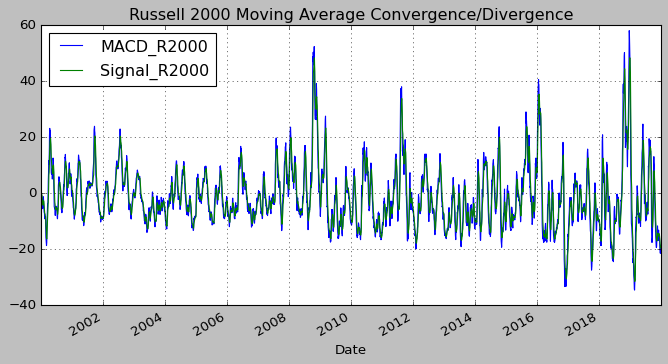

In [959]:
#Moving averages(EMA and SMA) for Russell 2000
data['SMA_20_R2000'] =data.iloc[:,2].rolling(window=20).mean()
data['EMA_50_R2000'] = data.iloc[:,2].ewm(span=50, adjust=False).mean()

 # Define Signal #When the value of the data series is greater than SMA then buy.
data['trading_signal_SMA_R2000'] = np.where(data.iloc[:,2] > data['SMA_20_R2000'], 1, 0)
data['trading_signal_EMA_R2000'] = np.where(data.iloc[:,2] > data['EMA_50_R2000'], 1, 0)
plt.figure(figsize=[10,5])
plt.plot(data.iloc[:,2],label='Russell 2000 Adj Close')
plt.plot(data['SMA_20_R2000'],label='SMA 20 days')
plt.plot(data['EMA_50_R2000'],label='EMA 50 days')
plt.grid(True)
plt.legend(loc=2)
plt.style.use('classic')
plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')


#Moving average convergence divergence strategy

# Calculate exponential moving average for Russell 2000
data['12d_EMA_R2000'] = data.iloc[:,2].ewm(span=12).mean()
data['26d_EMA_R2000'] = data.iloc[:,2].ewm(span=26).mean()
#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_R2000'] = data['26d_EMA_R2000'] - data['12d_EMA_R2000']
# Calculate Signal
data['Signal_R2000'] = data.MACD_R2000.ewm(span=9).mean()
data[['MACD_R2000','Signal_R2000']].plot(figsize=(10,5))
plt.grid(True)
plt.title('Russell 2000 Moving Average Convergence/Divergence')
plt.show()

# Define Signal #When the value of MACD series is greater than signal series then buy.
data['trading_signal_R2000'] = np.where(data['MACD_R2000'] > data['Signal_R2000'], 1, 0)


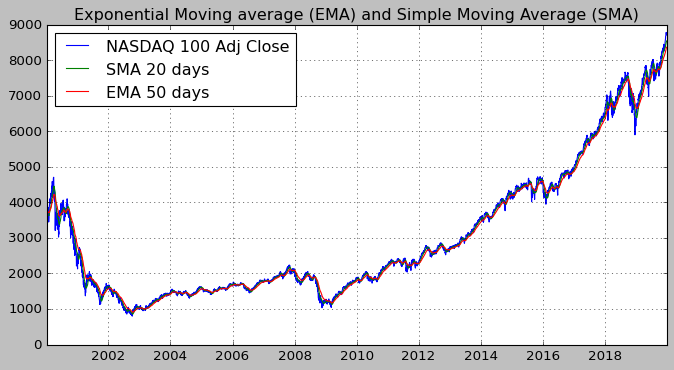

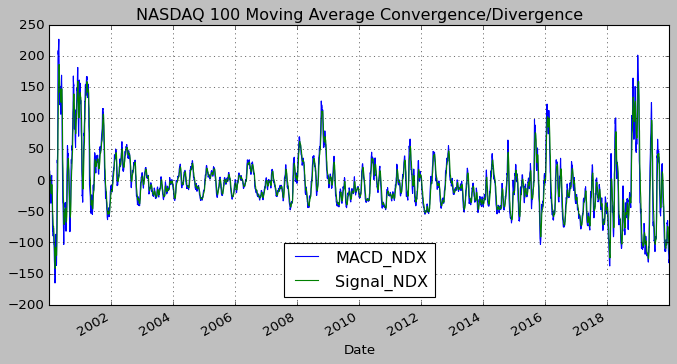

In [960]:
#Simple moving average for ^NDX
data['SMA_20_NDX'] =data.iloc[:,3].rolling(window=20).mean()
data['EMA_50_NDX'] = data.iloc[:,3].ewm(span=50, adjust=False).mean()

 # Define Signal #When the value of the data series is greater than SMA then buy.
data['trading_signal_SMA_NDX'] = np.where(data.iloc[:,3] > data['SMA_20_NDX'], 1, 0)
data['trading_signal_EMA_NDX'] = np.where(data.iloc[:,3] > data['EMA_50_NDX'], 1, 0)
plt.figure(figsize=[10,5])
plt.plot(data.iloc[:,3],label='NASDAQ 100 Adj Close')
plt.plot(data['SMA_20_NDX'],label='SMA 20 days')
plt.plot(data['EMA_50_NDX'],label='EMA 50 days')
plt.legend(loc=2)
plt.grid(True)
plt.style.use('classic')
plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')


#Moving average convergence divergence strategy

# Calculate exponential moving average for NASDAQ 100
data['12d_EMA_NDX'] = data.iloc[:,3].ewm(span=12).mean()
data['26d_EMA_NDX'] = data.iloc[:,3].ewm(span=26).mean()
#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_NDX'] = data['26d_EMA_NDX'] - data['12d_EMA_NDX']
# Calculate Signal
data['Signal_NDX'] = data.MACD_NDX.ewm(span=9).mean()
data[['MACD_NDX','Signal_NDX']].plot(figsize=(10,5))
plt.grid(True)
plt.title('NASDAQ 100 Moving Average Convergence/Divergence')
plt.show()

# Define Signal #When the value of MACD series is greater than signal series then buy.
data['trading_signal_NDX'] = np.where(data['MACD_NDX'] > data['Signal_NDX'], 1, 0)

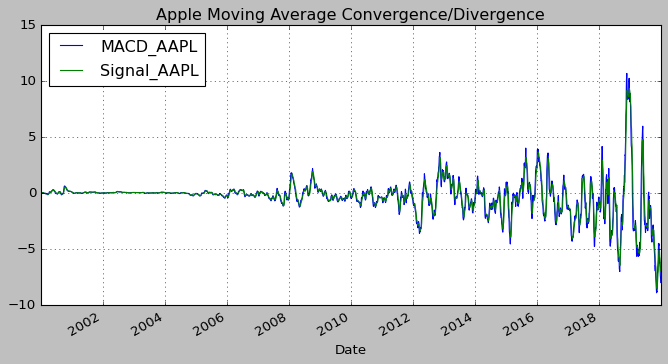

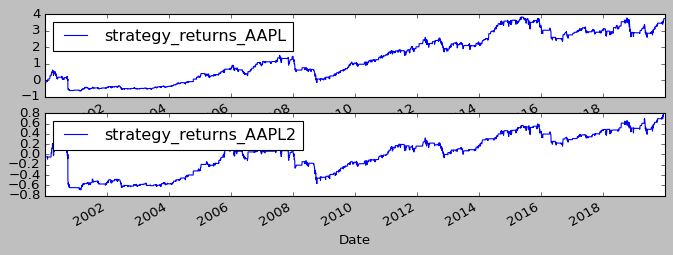

In [961]:
#Moving average convergence divergence strategy for AAPL

# Calculate exponential moving average for Apple Stock
data['12d_EMA_AAPL'] = data.iloc[:,4].ewm(span=12).mean()
data['26d_EMA_AAPL'] = data.iloc[:,4].ewm(span=26).mean()
#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_AAPL'] = data['26d_EMA_AAPL'] - data['12d_EMA_AAPL']
# Calculate Signal
data['Signal_AAPL'] = data.MACD_AAPL.ewm(span=9).mean()
data[['MACD_AAPL','Signal_AAPL']].plot(figsize=(10,5))
plt.grid(True)
plt.title('Apple Moving Average Convergence/Divergence')
plt.show()


# Define Signal for Apple #When the value of MACD series is greater than signal series then buy.
data['trading_signal_AAPL'] = np.where(data['MACD_AAPL'] > data['Signal_AAPL'], 1, 0)

# Calculate Returns
data['AAPLreturns'] = data.iloc[:,4].pct_change()

# Calculate Strategy Returns
data['strategy_returns_AAPL'] = data.AAPLreturns * data.trading_signal_AAPL.shift(1)

# Calculate Cumulative Returns
cumulative_returns_AAPL = (data.strategy_returns_AAPL + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(312)
cumulative_returns_AAPL.plot(figsize=(10,5))
plt.legend(loc='upper left')

#AAPL MACD strategy with NDX MACD Filter

# Calculate Strategy Returns
data['strategy_returns_AAPL2'] = data.AAPLreturns * data.trading_signal_AAPL.shift(1) * data.trading_signal_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_AAPL2 = (data.strategy_returns_AAPL2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(313)
cumulative_returns_AAPL2.plot(figsize=(10,5))
plt.legend(loc='upper left')
plt.show()

In [962]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_AAPL = ((1 + data.strategy_returns_AAPL.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of AAPL is %.2f%%' % annual_returns_AAPL)

# Calculate the annualised volatility
annual_volatility_AAPL = data.strategy_returns_AAPL.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of AAPL is %.2f%%' % annual_volatility_AAPL)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_AAPL = data.strategy_returns_AAPL - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_AAPL = (excess_daily_returns_AAPL.mean() /
                excess_daily_returns_AAPL.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of AAPL is %.2f' % sharpe_ratio_AAPL)

The CAGR for MACD strategy of AAPL is 13.87%
The annualised volatility for MACD strategy of AAPL is 31.02%
The Sharpe ratio for MACD strategy of AAPL is 0.23


In [963]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_AAPL2 = ((1 + data.strategy_returns_AAPL2.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of AAPL with NDX MACD filter is %.2f%%' % annual_returns_AAPL2)

# Calculate the annualised volatility
annual_volatility_AAPL2 = data.strategy_returns_AAPL2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of AAPL with NDX MACD filter is %.2f%%' % annual_volatility_AAPL2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_AAPL2 = data.strategy_returns_AAPL2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_AAPL2 = (excess_daily_returns_AAPL2.mean() /
                excess_daily_returns_AAPL2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of AAPL with NDX MACD filter is %.2f' % sharpe_ratio_AAPL2)

The CAGR for MACD strategy of AAPL with NDX MACD filter is 7.46%
The annualised volatility for MACD strategy of AAPL with NDX MACD filter is 27.83%
The Sharpe ratio for MACD strategy of AAPL with NDX MACD filter is 0.04


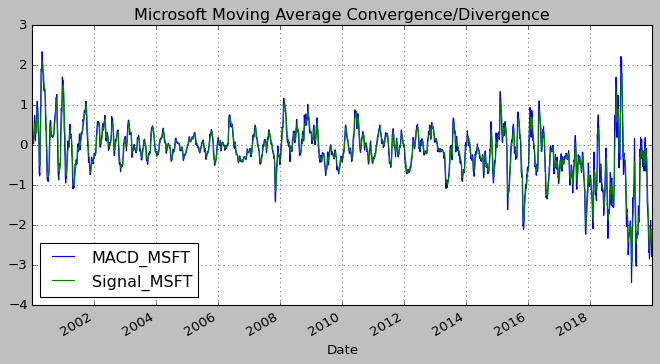

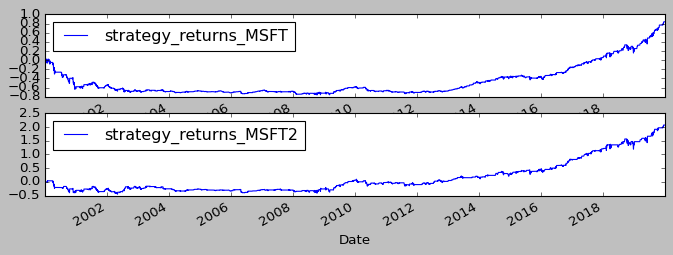

In [964]:
#Moving average convergence divergence strategy for MSFT

# Calculate exponential moving average for Apple Stock
data['12d_EMA_MSFT'] = data.iloc[:,5].ewm(span=12).mean()
data['26d_EMA_MSFT'] = data.iloc[:,5].ewm(span=26).mean()
#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_MSFT'] = data['26d_EMA_MSFT'] - data['12d_EMA_MSFT']
# Calculate Signal
data['Signal_MSFT'] = data.MACD_MSFT.ewm(span=9).mean()
data[['MACD_MSFT','Signal_MSFT']].plot(figsize=(10,5))
plt.grid(True)
plt.title('Microsoft Moving Average Convergence/Divergence')
plt.show()

# Define Signal for Apple #When the value of MACD series is greater than signal series then buy.
data['trading_signal_MSFT'] = np.where(data['MACD_MSFT'] > data['Signal_MSFT'], 1, 0)

# Calculate Returns
data['MSFTreturns'] = data.iloc[:,5].pct_change()

# Calculate Strategy Returns
data['strategy_returns_MSFT'] = data.MSFTreturns * data.trading_signal_MSFT.shift(1)

# Calculate Cumulative Returns
cumulative_returns_MSFT = (data.strategy_returns_MSFT + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(312)
cumulative_returns_MSFT.plot(figsize=(10,5))
plt.legend(loc='upper left')

#MSFT MACD strategy with NDX MACD Filter

# Calculate Strategy Returns
data['strategy_returns_MSFT2'] = data.MSFTreturns * data.trading_signal_MSFT.shift(1) * data.trading_signal_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_MSFT2 = (data.strategy_returns_MSFT2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(313)
cumulative_returns_MSFT2.plot(figsize=(10,5))
plt.legend(loc='upper left')
plt.show()

In [965]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_MSFT = ((1 + data.strategy_returns_MSFT.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of MSFT is %.2f%%' % annual_returns_MSFT)

# Calculate the annualised volatility
annual_volatility_MSFT = data.strategy_returns_MSFT.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of MSFT is %.2f%%' % annual_volatility_MSFT)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_MSFT = data.strategy_returns_MSFT - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_MSFT = (excess_daily_returns_MSFT.mean() /
                excess_daily_returns_MSFT.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of MSFT is %.2f' % sharpe_ratio_MSFT)

The CAGR for MACD strategy of MSFT is 5.75%
The annualised volatility for MACD strategy of MSFT is 22.58%
The Sharpe ratio for MACD strategy of MSFT is -0.02


In [966]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_MSFT2 = ((1 + data.strategy_returns_MSFT2.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of MSFT with NDX MACD filter is %.2f%%' % annual_returns_MSFT2)

# Calculate the annualised volatility
annual_volatility_MSFT2 = data.strategy_returns_MSFT2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of MSFT with NDX MACD filter is %.2f%%' % annual_volatility_MSFT2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_MSFT2 = data.strategy_returns_MSFT2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_MSFT2 = (excess_daily_returns_MSFT2.mean() /
                excess_daily_returns_MSFT2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of MSFT with NDX MACD filter is %.2f' % sharpe_ratio_MSFT2)

The CAGR for MACD strategy of MSFT with NDX MACD filter is 7.97%
The annualised volatility for MACD strategy of MSFT with NDX MACD filter is 20.31%
The Sharpe ratio for MACD strategy of MSFT with NDX MACD filter is 0.08


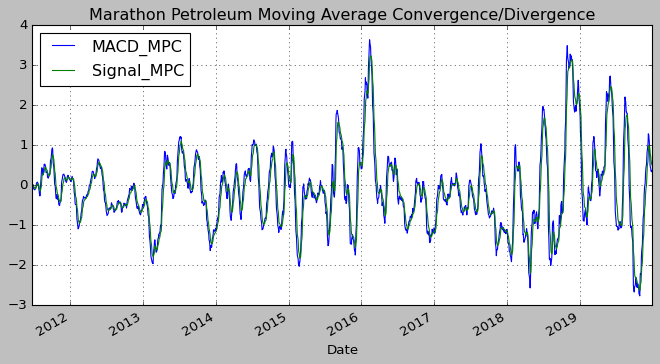

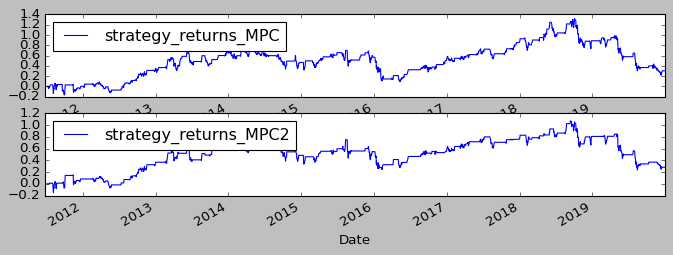

In [967]:
#Moving average convergence divergence strategy for MPC

# Calculate exponential moving average for Apple Stock
data['12d_EMA_MPC'] = data.iloc[:,6].ewm(span=12).mean()
data['26d_EMA_MPC'] = data.iloc[:,6].ewm(span=26).mean()
#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_MPC'] = data['26d_EMA_MPC'] - data['12d_EMA_MPC']
# Calculate Signal
data['Signal_MPC'] = data.MACD_MPC.ewm(span=9).mean()
data[['MACD_MPC','Signal_MPC']].plot(figsize=(10,5))
plt.grid(True)
plt.title('Marathon Petroleum Moving Average Convergence/Divergence')
plt.show()

# Define Signal for Apple #When the value of MACD series is greater than signal series then buy.
data['trading_signal_MPC'] = np.where(data['MACD_MPC'] > data['Signal_MPC'], 1, 0)

# Calculate Returns
data['MPCreturns'] = data.iloc[:,6].pct_change()

# Calculate Strategy Returns
data['strategy_returns_MPC'] = data.MPCreturns * data.trading_signal_MPC.shift(1)

# Calculate Cumulative Returns
cumulative_returns_MPC = (data.strategy_returns_MPC + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(312)
cumulative_returns_MPC.plot(figsize=(10,5))
plt.legend(loc='upper left')

#MPC MACD strategy with SP500 MACD Filter

# Calculate Strategy Returns
data['strategy_returns_MPC2'] = data.MPCreturns * data.trading_signal_MPC.shift(1) * data.trading_signal_SP500.shift(1)

# Calculate Cumulative Returns
cumulative_returns_MPC2 = (data.strategy_returns_MPC2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(313)
cumulative_returns_MPC2.plot(figsize=(10,5))
plt.legend(loc='upper left')
plt.show()


In [968]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_MPC = ((1 + data.strategy_returns_MPC.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of MPC is %.2f%%' % annual_returns_MPC)

# Calculate the annualised volatility
annual_volatility_MPC = data.strategy_returns_MPC.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of MPC is %.2f%%' % annual_volatility_MPC)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_MPC = data.strategy_returns_MPC - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_MPC = (excess_daily_returns_MPC.mean() /
                excess_daily_returns_MPC.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of MPC is %.2f' % sharpe_ratio_MPC)

The CAGR for MACD strategy of MPC is 6.45%
The annualised volatility for MACD strategy of MPC is 24.87%
The Sharpe ratio for MACD strategy of MPC is 0.01


In [969]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_MPC2 = ((1 + data.strategy_returns_MPC2.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of MPC with SP500 MACD filter is %.2f%%' % annual_returns_MPC2)

# Calculate the annualised volatility
annual_volatility_MPC2 = data.strategy_returns_MPC2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of MPC with SP500 MACD filter is %.2f%%' % annual_volatility_MPC2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_MPC2 = data.strategy_returns_MPC2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_MPC2 = (excess_daily_returns_MPC2.mean() /
                excess_daily_returns_MPC2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of MPC with SP500 MACD filter is %.2f' % sharpe_ratio_MPC2)

The CAGR for MACD strategy of MPC with SP500 MACD filter is 5.43%
The annualised volatility for MACD strategy of MPC with SP500 MACD filter is 21.73%
The Sharpe ratio for MACD strategy of MPC with SP500 MACD filter is -0.03


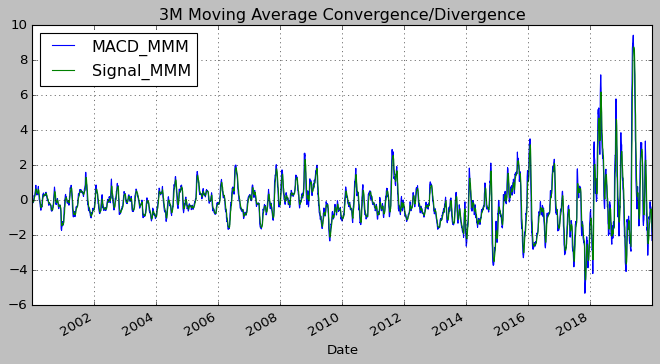

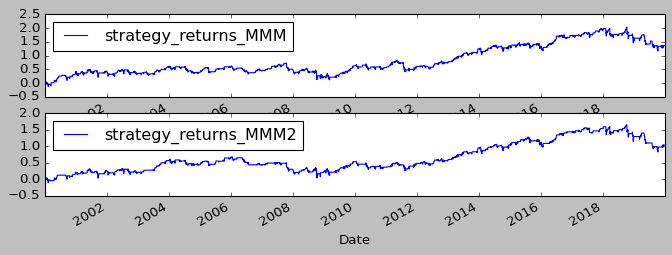

In [970]:
#Moving average convergence divergence strategy for MMM

# Calculate exponential moving average for Apple Stock
data['12d_EMA_MMM'] = data.iloc[:,7].ewm(span=12).mean()
data['26d_EMA_MMM'] = data.iloc[:,7].ewm(span=26).mean()
#Calculate and plot the MACD series which is the difference 26-day EMA and 12-day EMA and signal series which is 9 day EMA of the MACD series.
# Calculate MACD 
data['MACD_MMM'] = data['26d_EMA_MMM'] - data['12d_EMA_MMM']
# Calculate Signal
data['Signal_MMM'] = data.MACD_MMM.ewm(span=9).mean()
data[['MACD_MMM','Signal_MMM']].plot(figsize=(10,5))
plt.grid(True)
plt.title('3M Moving Average Convergence/Divergence')
plt.show()

# Define Signal for Apple #When the value of MACD series is greater than signal series then buy.
data['trading_signal_MMM'] = np.where(data['MACD_MMM'] > data['Signal_MMM'], 1, 0)

# Calculate Returns
data['MMMreturns'] = data.iloc[:,7].pct_change()

# Calculate Strategy Returns
data['strategy_returns_MMM'] = data.MMMreturns * data.trading_signal_MMM.shift(1)

# Calculate Cumulative Returns
cumulative_returns_MMM = (data.strategy_returns_MMM + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(312)
cumulative_returns_MMM.plot(figsize=(10,5))
plt.legend(loc='upper left')

#MMM MACD strategy with DJI MACD Filter

# Calculate Strategy Returns
data['strategy_returns_MMM2'] = data.MMMreturns * data.trading_signal_MMM.shift(1) * data.trading_signal_DJI.shift(1)

# Calculate Cumulative Returns
cumulative_returns_MMM2 = (data.strategy_returns_MMM2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(313)
cumulative_returns_MMM2.plot(figsize=(10,5))
plt.legend(loc='upper left')
plt.show()

In [971]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_MMM = ((1 + data.strategy_returns_MMM.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of MMM is %.2f%%' % annual_returns_MMM)

# Calculate the annualised volatility
annual_volatility_MMM = data.strategy_returns_MMM.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of MMM is %.2f%%' % annual_volatility_MMM)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_MMM = data.strategy_returns_MMM - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_MMM = (excess_daily_returns_MMM.mean() /
                excess_daily_returns_MMM.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of MMM is %.2f' % sharpe_ratio_MMM)

The CAGR for MACD strategy of MMM is 5.89%
The annualised volatility for MACD strategy of MMM is 16.80%
The Sharpe ratio for MACD strategy of MMM is -0.02


In [972]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_MMM2 = ((1 + data.strategy_returns_MMM2.mean())**(trading_days) - 1)*100
print('The CAGR for MACD strategy of MMM with DJI MACD filter is %.2f%%' % annual_returns_MMM2)

# Calculate the annualised volatility
annual_volatility_MMM2 = data.strategy_returns_MMM2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for MACD strategy of MMM with DJI MACD filter is %.2f%%' % annual_volatility_MMM2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_MMM2 = data.strategy_returns_MMM2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_MMM2 = (excess_daily_returns_MMM2.mean() /
                excess_daily_returns_MMM2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for MACD strategy of MMM with DJI MACD filter is %.2f' % sharpe_ratio_MMM2)

The CAGR for MACD strategy of MMM with DJI MACD filter is 4.85%
The annualised volatility for MACD strategy of MMM with DJI MACD filter is 15.32%
The Sharpe ratio for MACD strategy of MMM with DJI MACD filter is -0.08


In [973]:
from tabulate import tabulate
print(tabulate([['AAPL return', annual_returns_AAPL, annual_returns_AAPL2, annual_returns_AAPL - annual_returns_AAPL2], ['AAPL vol', annual_volatility_AAPL, annual_volatility_AAPL2, annual_volatility_AAPL - annual_volatility_AAPL2],['AAPL sharpe', sharpe_ratio_AAPL, sharpe_ratio_AAPL2, sharpe_ratio_AAPL - sharpe_ratio_AAPL2]], headers=['AAPL Results', 'MACD', 'MACD with \n Index MACD', 'Difference']))

AAPL Results         MACD     MACD with     Difference
                              Index MACD
--------------  ---------  -------------  ------------
AAPL return     13.8721        7.46045        6.4116
AAPL vol        31.0158       27.827          3.18879
AAPL sharpe      0.225494      0.0429906      0.182504


In [974]:
from tabulate import tabulate
print(tabulate([['MMM return', annual_returns_MSFT, annual_returns_MSFT2, annual_returns_MSFT - annual_returns_MSFT2], ['MSFT vol', annual_volatility_MSFT, annual_volatility_MSFT2, annual_volatility_MSFT - annual_volatility_MSFT2],['MSFT sharpe', sharpe_ratio_MSFT, sharpe_ratio_MSFT2, sharpe_ratio_MSFT - sharpe_ratio_MSFT2]], headers=['MSFT Results', 'MACD', 'MACD with \n Index MACD', 'Difference']))

MSFT Results          MACD     MACD with     Difference
                               Index MACD
--------------  ----------  -------------  ------------
MMM return       5.75242          7.96729     -2.21487
MSFT vol        22.5807          20.3092       2.27149
MSFT sharpe     -0.0179946        0.08208     -0.100075


In [975]:
from tabulate import tabulate
print(tabulate([['MPC return', annual_returns_MPC, annual_returns_MPC2, annual_returns_MPC - annual_returns_MPC2], ['MPC vol', annual_volatility_MPC, annual_volatility_MPC2, annual_volatility_MPC - annual_volatility_MPC2],['MPC sharpe', sharpe_ratio_MPC, sharpe_ratio_MPC2, sharpe_ratio_MPC - sharpe_ratio_MPC2]], headers=['MPC Results', 'MACD', 'MACD with \n Index MACD', 'Difference']))

MPC Results           MACD     MACD with     Difference
                               Index MACD
-------------  -----------  -------------  ------------
MPC return      6.4452          5.42946       1.01574
MPC vol        24.8719         21.7266        3.14523
MPC sharpe      0.00992221     -0.0327824     0.0427046


In [976]:
from tabulate import tabulate
print(tabulate([['MMM return', annual_returns_MMM, annual_returns_MMM2, annual_returns_MMM - annual_returns_MMM2], ['MMM vol', annual_volatility_MMM, annual_volatility_MMM2, annual_volatility_MMM - annual_volatility_MMM2],['MMM sharpe', sharpe_ratio_MMM, sharpe_ratio_MMM2, sharpe_ratio_MMM - sharpe_ratio_MMM2]], headers=['MMM Results', 'MACD', 'MACD with \n Index MACD', 'Difference']))

MMM Results          MACD     MACD with     Difference
                              Index MACD
-------------  ----------  -------------  ------------
MMM return      5.89182        4.84644       1.04538
MMM vol        16.7998        15.3235        1.47626
MMM sharpe     -0.0163434     -0.0826766     0.0663331


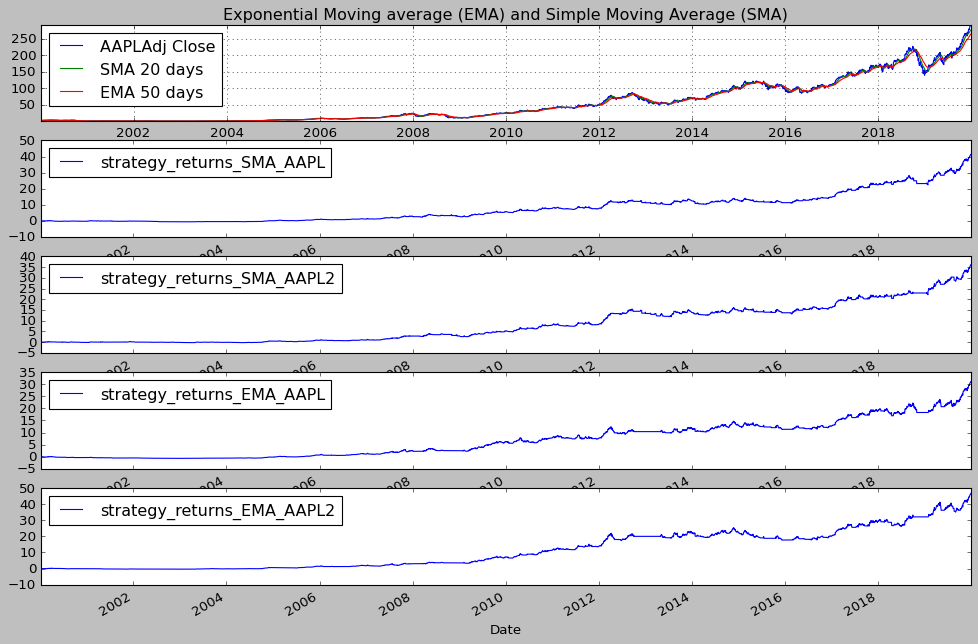

In [977]:
 #Moving averages(EMA and SMA) for AAPL
 data['SMA_20_AAPL']=data.iloc[:,4].rolling(window=20).mean()
 data['EMA_50_AAPL'] = data.iloc[:,4].ewm(span=50, adjust=False).mean()
 plt.subplot(511)
 plt.plot(data.iloc[:,4],label='AAPLAdj Close')
 plt.plot(data['SMA_20_AAPL'],label='SMA 20 days')
 plt.plot(data['EMA_50_AAPL'],label='EMA 50 days')
 plt.grid(True)
 plt.axis('tight')
 plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')
 plt.legend(loc=2)


# Define Signal for Apple #When the value of data series is greater than MA series then buy.
data['trading_signal_SMA_AAPL'] = np.where(data.iloc[:,4] > data['SMA_20_AAPL'], 1, 0)
data['trading_signal_EMA_AAPL'] = np.where(data.iloc[:,4] > data['EMA_50_AAPL'], 1, 0)

# Calculate Returns
data['AAPLreturns'] = data.iloc[:,4].pct_change()

# Calculate Strategy Returns
data['strategy_returns_SMA_AAPL'] = data.AAPLreturns * data.trading_signal_SMA_AAPL.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_AAPL = (data.strategy_returns_SMA_AAPL + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(512)
cumulative_returns_SMA_AAPL.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_SMA_AAPL2'] = data.AAPLreturns * data.trading_signal_SMA_AAPL.shift(1) * data.trading_signal_SMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_AAPL2 = (data.strategy_returns_SMA_AAPL2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(513)
cumulative_returns_SMA_AAPL2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_AAPL'] = data.AAPLreturns * data.trading_signal_EMA_AAPL.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_AAPL = (data.strategy_returns_EMA_AAPL + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(514)
cumulative_returns_EMA_AAPL.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_AAPL2'] = data.AAPLreturns * data.trading_signal_EMA_AAPL.shift(1) * data.trading_signal_EMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_AAPL2 = (data.strategy_returns_EMA_AAPL2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(515)
cumulative_returns_EMA_AAPL2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')
plt.show()



In [978]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_AAPL = ((1 + data.strategy_returns_SMA_AAPL.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy of AAPL is %.2f%%' % annual_returns_SMA_AAPL)

# Calculate the annualised volatility
annual_volatility_SMA_AAPL = data.strategy_returns_SMA_AAPL.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy of AAPL is %.2f%%' % annual_volatility_SMA_AAPL)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_AAPL = data.strategy_returns_SMA_AAPL - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_AAPL = (excess_daily_returns_SMA_AAPL.mean() /
                excess_daily_returns_SMA_AAPL.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy of AAPL is %.2f' % sharpe_ratio_SMA_AAPL)

The CAGR for SMA strategy of AAPL is 24.87%
The annualised volatility for SMA strategy of AAPL is 26.32%
The Sharpe ratio for SMA strategy of AAPL is 0.62


In [979]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_AAPL2 = ((1 + data.strategy_returns_SMA_AAPL2.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy with NDX filter of AAPL is %.2f%%' % annual_returns_SMA_AAPL2)

# Calculate the annualised volatility
annual_volatility_SMA_AAPL2 = data.strategy_returns_SMA_AAPL2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy with NDX filter of AAPL is %.2f%%' % annual_volatility_SMA_AAPL2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_AAPL2 = data.strategy_returns_SMA_AAPL2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_AAPL2 = (excess_daily_returns_SMA_AAPL2.mean() /
                excess_daily_returns_SMA_AAPL2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy with NDX filter of AAPL is %.2f' % sharpe_ratio_SMA_AAPL2)

The CAGR for SMA strategy with NDX filter of AAPL is 22.72%
The annualised volatility for SMA strategy with NDX filter of AAPL is 21.91%
The Sharpe ratio for SMA strategy with NDX filter of AAPL is 0.66


In [980]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_AAPL = ((1 + data.strategy_returns_EMA_AAPL.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of AAPL is %.2f%%' % annual_returns_EMA_AAPL)

# Calculate the annualised volatility
annual_volatility_EMA_AAPL = data.strategy_returns_EMA_AAPL.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of AAPL is %.2f%%' % annual_volatility_EMA_AAPL)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_AAPL = data.strategy_returns_EMA_AAPL - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_AAPL = (excess_daily_returns_EMA_AAPL.mean() /
                excess_daily_returns_EMA_AAPL.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of AAPL is %.2f' % sharpe_ratio_EMA_AAPL)

The CAGR for EMA strategy of AAPL is 23.54%
The annualised volatility for EMA strategy of AAPL is 27.46%
The Sharpe ratio for EMA strategy of AAPL is 0.55


In [981]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_AAPL2 = ((1 + data.strategy_returns_EMA_AAPL2.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of AAPL is %.2f%%' % annual_returns_EMA_AAPL2)

# Calculate the annualised volatility
annual_volatility_EMA_AAPL2 = data.strategy_returns_EMA_AAPL2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of AAPL is %.2f%%' % annual_volatility_EMA_AAPL2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_AAPL2 = data.strategy_returns_EMA_AAPL2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_AAPL2 = (excess_daily_returns_EMA_AAPL2.mean() /
                excess_daily_returns_EMA_AAPL2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of AAPL is %.2f' % sharpe_ratio_EMA_AAPL2)

The CAGR for EMA strategy of AAPL is 24.42%
The annualised volatility for EMA strategy of AAPL is 22.39%
The Sharpe ratio for EMA strategy of AAPL is 0.71


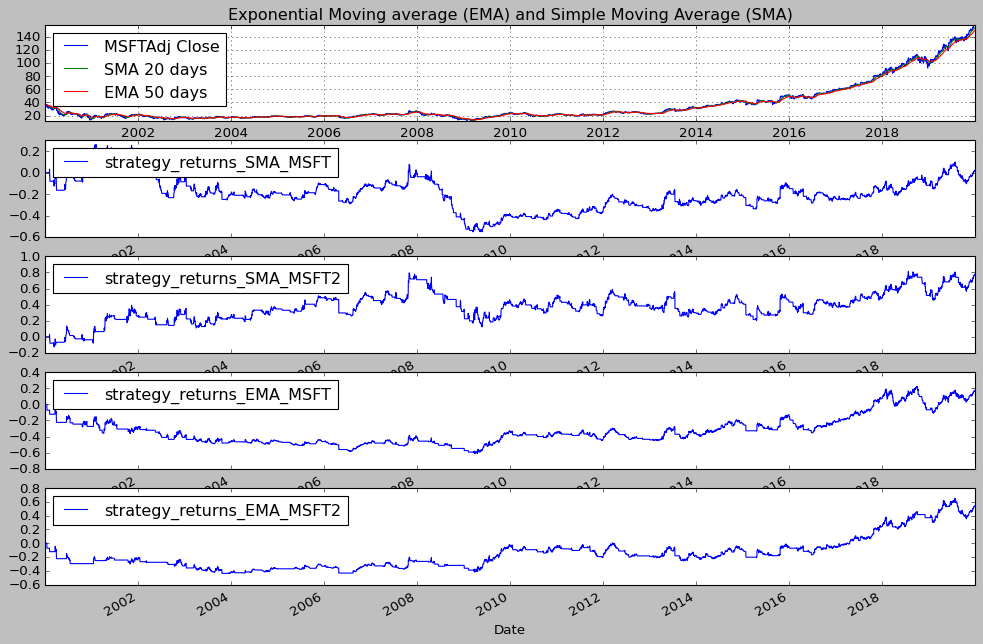

In [982]:
 #Moving averages(EMA and SMA) for MSFT
 data['SMA_20_MSFT']=data.iloc[:,5].rolling(window=20).mean()
 data['EMA_50_MSFT'] = data.iloc[:,5].ewm(span=50, adjust=False).mean()
 plt.subplot(511)
 plt.plot(data.iloc[:,5],label='MSFTAdj Close')
 plt.plot(data['SMA_20_MSFT'],label='SMA 20 days')
 plt.plot(data['EMA_50_MSFT'],label='EMA 50 days')
 plt.grid(True)
 plt.axis('tight')
 plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')
 plt.legend(loc=2)


# Define Signal for Apple #When the value of data series is greater than MA series then buy.
data['trading_signal_SMA_MSFT'] = np.where(data.iloc[:,5] > data['SMA_20_MSFT'], 1, 0)
data['trading_signal_EMA_MSFT'] = np.where(data.iloc[:,5] > data['EMA_50_MSFT'], 1, 0)

# Calculate Returns
data['MSFTreturns'] = data.iloc[:,5].pct_change()

# Calculate Strategy Returns
data['strategy_returns_SMA_MSFT'] = data.MSFTreturns * data.trading_signal_SMA_MSFT.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_MSFT = (data.strategy_returns_SMA_MSFT + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(512)
cumulative_returns_SMA_MSFT.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_SMA_MSFT2'] = data.MSFTreturns * data.trading_signal_SMA_MSFT.shift(1) * data.trading_signal_SMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_MSFT2 = (data.strategy_returns_SMA_MSFT2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(513)
cumulative_returns_SMA_MSFT2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_MSFT'] = data.MSFTreturns * data.trading_signal_EMA_MSFT.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_MSFT = (data.strategy_returns_EMA_MSFT + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(514)
cumulative_returns_EMA_MSFT.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_MSFT2'] = data.MSFTreturns * data.trading_signal_EMA_MSFT.shift(1) * data.trading_signal_EMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_MSFT2 = (data.strategy_returns_EMA_MSFT2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(515)
cumulative_returns_EMA_MSFT2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')
plt.show()



In [983]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_MSFT = ((1 + data.strategy_returns_SMA_MSFT.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy of MSFT is %.2f%%' % annual_returns_SMA_MSFT)

# Calculate the annualised volatility
annual_volatility_SMA_MSFT = data.strategy_returns_SMA_MSFT.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy of MSFT is %.2f%%' % annual_volatility_SMA_MSFT)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_MSFT = data.strategy_returns_SMA_MSFT - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_MSFT = (excess_daily_returns_SMA_MSFT.mean() /
                excess_daily_returns_SMA_MSFT.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy of MSFT is %.2f' % sharpe_ratio_SMA_MSFT)

The CAGR for SMA strategy of MSFT is 2.05%
The annualised volatility for SMA strategy of MSFT is 19.75%
The Sharpe ratio for SMA strategy of MSFT is -0.20


In [984]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_MSFT2 = ((1 + data.strategy_returns_SMA_MSFT2.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy with NDX filter of MSFT is %.2f%%' % annual_returns_SMA_MSFT2)

# Calculate the annualised volatility
annual_volatility_SMA_MSFT2 = data.strategy_returns_SMA_MSFT2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy with NDX filter of MSFT is %.2f%%' % annual_volatility_SMA_MSFT2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_MSFT2 = data.strategy_returns_SMA_MSFT2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_MSFT2 = (excess_daily_returns_SMA_MSFT2.mean() /
                excess_daily_returns_SMA_MSFT2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy with NDX filter of MSFT is %.2f' % sharpe_ratio_SMA_MSFT2)

The CAGR for SMA strategy with NDX filter of MSFT is 4.32%
The annualised volatility for SMA strategy with NDX filter of MSFT is 16.67%
The Sharpe ratio for SMA strategy with NDX filter of MSFT is -0.11


In [985]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_MSFT = ((1 + data.strategy_returns_EMA_MSFT.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of MSFT is %.2f%%' % annual_returns_EMA_MSFT)

# Calculate the annualised volatility
annual_volatility_EMA_MSFT = data.strategy_returns_EMA_MSFT.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of MSFT is %.2f%%' % annual_volatility_EMA_MSFT)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_MSFT = data.strategy_returns_EMA_MSFT - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_MSFT = (excess_daily_returns_EMA_MSFT.mean() /
                excess_daily_returns_EMA_MSFT.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of MSFT is %.2f' % sharpe_ratio_EMA_MSFT)

The CAGR for EMA strategy of MSFT is 2.67%
The annualised volatility for EMA strategy of MSFT is 19.33%
The Sharpe ratio for EMA strategy of MSFT is -0.17


In [986]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_MSFT2 = ((1 + data.strategy_returns_EMA_MSFT2.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of MSFT is %.2f%%' % annual_returns_EMA_MSFT2)

# Calculate the annualised volatility
annual_volatility_EMA_MSFT2 = data.strategy_returns_EMA_MSFT2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of MSFT is %.2f%%' % annual_volatility_EMA_MSFT2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_MSFT2 = data.strategy_returns_EMA_MSFT2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_MSFT2 = (excess_daily_returns_EMA_MSFT2.mean() /
                excess_daily_returns_EMA_MSFT2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of MSFT is %.2f' % sharpe_ratio_EMA_MSFT2)

The CAGR for EMA strategy of MSFT is 3.68%
The annualised volatility for EMA strategy of MSFT is 17.15%
The Sharpe ratio for EMA strategy of MSFT is -0.14


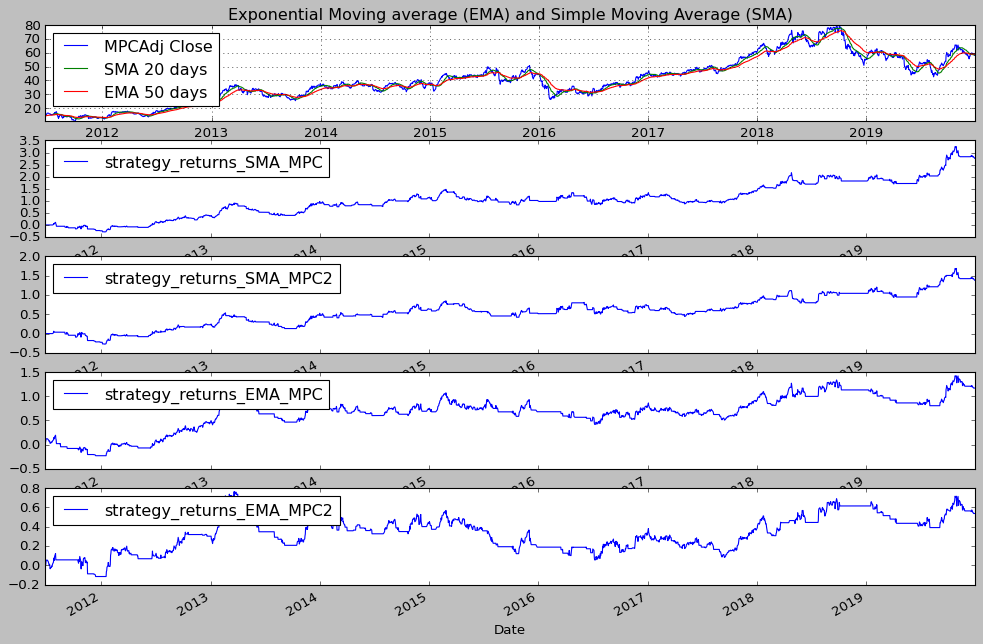

In [987]:
 #Moving averages(EMA and SMA) for MPC
 data['SMA_20_MPC']=data.iloc[:,6].rolling(window=20).mean()
 data['EMA_50_MPC'] = data.iloc[:,6].ewm(span=50, adjust=False).mean()
 plt.subplot(511)
 plt.plot(data.iloc[:,6],label='MPCAdj Close')
 plt.plot(data['SMA_20_MPC'],label='SMA 20 days')
 plt.plot(data['EMA_50_MPC'],label='EMA 50 days')
 plt.grid(True)
 plt.axis('tight')
 plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')
 plt.legend(loc=2)


# Define Signal for Apple #When the value of data series is greater than MA series then buy.
data['trading_signal_SMA_MPC'] = np.where(data.iloc[:,6] > data['SMA_20_MPC'], 1, 0)
data['trading_signal_EMA_MPC'] = np.where(data.iloc[:,6] > data['EMA_50_MPC'], 1, 0)

# Calculate Returns
data['MPCreturns'] = data.iloc[:,6].pct_change()

# Calculate Strategy Returns
data['strategy_returns_SMA_MPC'] = data.MPCreturns * data.trading_signal_SMA_MPC.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_MPC = (data.strategy_returns_SMA_MPC + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(512)
cumulative_returns_SMA_MPC.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_SMA_MPC2'] = data.MPCreturns * data.trading_signal_SMA_MPC.shift(1) * data.trading_signal_SMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_MPC2 = (data.strategy_returns_SMA_MPC2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(513)
cumulative_returns_SMA_MPC2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_MPC'] = data.MPCreturns * data.trading_signal_EMA_MPC.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_MPC = (data.strategy_returns_EMA_MPC + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(514)
cumulative_returns_EMA_MPC.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_MPC2'] = data.MPCreturns * data.trading_signal_EMA_MPC.shift(1) * data.trading_signal_EMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_MPC2 = (data.strategy_returns_EMA_MPC2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(515)
cumulative_returns_EMA_MPC2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')
plt.show()



In [988]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_MPC = ((1 + data.strategy_returns_SMA_MPC.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy of MPC is %.2f%%' % annual_returns_SMA_MPC)

# Calculate the annualised volatility
annual_volatility_SMA_MPC = data.strategy_returns_SMA_MPC.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy of MPC is %.2f%%' % annual_volatility_SMA_MPC)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_MPC = data.strategy_returns_SMA_MPC - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_MPC = (excess_daily_returns_SMA_MPC.mean() /
                excess_daily_returns_SMA_MPC.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy of MPC is %.2f' % sharpe_ratio_SMA_MPC)

The CAGR for SMA strategy of MPC is 20.29%
The annualised volatility for SMA strategy of MPC is 24.09%
The Sharpe ratio for SMA strategy of MPC is 0.52


In [989]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_MPC2 = ((1 + data.strategy_returns_SMA_MPC2.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy with NDX filter of MPC is %.2f%%' % annual_returns_SMA_MPC2)

# Calculate the annualised volatility
annual_volatility_SMA_MPC2 = data.strategy_returns_SMA_MPC2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy with NDX filter of MPC is %.2f%%' % annual_volatility_SMA_MPC2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_MPC2 = data.strategy_returns_SMA_MPC2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_MPC2 = (excess_daily_returns_SMA_MPC2.mean() /
                excess_daily_returns_SMA_MPC2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy with NDX filter of MPC is %.2f' % sharpe_ratio_SMA_MPC2)

The CAGR for SMA strategy with NDX filter of MPC is 13.14%
The annualised volatility for SMA strategy with NDX filter of MPC is 20.76%
The Sharpe ratio for SMA strategy with NDX filter of MPC is 0.31


In [990]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_MPC = ((1 + data.strategy_returns_EMA_MPC.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of MPC is %.2f%%' % annual_returns_EMA_MPC)

# Calculate the annualised volatility
annual_volatility_EMA_MPC = data.strategy_returns_EMA_MPC.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of MPC is %.2f%%' % annual_volatility_EMA_MPC)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_MPC = data.strategy_returns_EMA_MPC - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_MPC = (excess_daily_returns_EMA_MPC.mean() /
                excess_daily_returns_EMA_MPC.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of MPC is %.2f' % sharpe_ratio_EMA_MPC)

The CAGR for EMA strategy of MPC is 12.77%
The annualised volatility for EMA strategy of MPC is 24.08%
The Sharpe ratio for EMA strategy of MPC is 0.25


In [991]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_MPC2 = ((1 + data.strategy_returns_EMA_MPC2.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of MPC is %.2f%%' % annual_returns_EMA_MPC2)

# Calculate the annualised volatility
annual_volatility_EMA_MPC2 = data.strategy_returns_EMA_MPC2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of MPC is %.2f%%' % annual_volatility_EMA_MPC2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_MPC2 = data.strategy_returns_EMA_MPC2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_MPC2 = (excess_daily_returns_EMA_MPC2.mean() /
                excess_daily_returns_EMA_MPC2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of MPC is %.2f' % sharpe_ratio_EMA_MPC2)

The CAGR for EMA strategy of MPC is 7.69%
The annualised volatility for EMA strategy of MPC is 21.69%
The Sharpe ratio for EMA strategy of MPC is 0.06


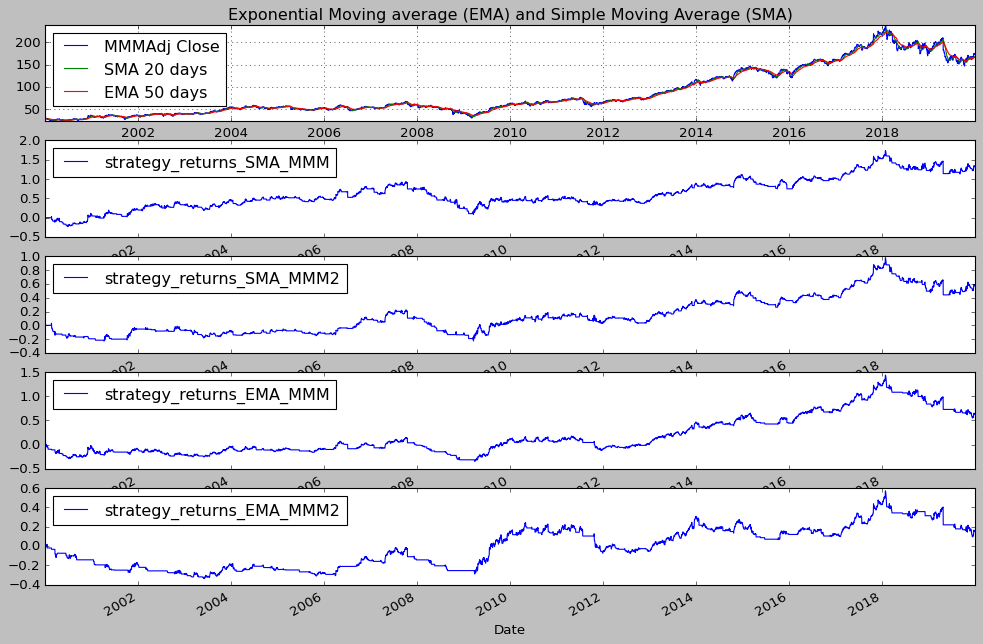

In [992]:
 #Moving averages(EMA and SMA) for MMM
 data['SMA_20_MMM']=data.iloc[:,7].rolling(window=20).mean()
 data['EMA_50_MMM'] = data.iloc[:,7].ewm(span=50, adjust=False).mean()
 plt.subplot(511)
 plt.plot(data.iloc[:,7],label='MMMAdj Close')
 plt.plot(data['SMA_20_MMM'],label='SMA 20 days')
 plt.plot(data['EMA_50_MMM'],label='EMA 50 days')
 plt.grid(True)
 plt.axis('tight')
 plt.title('Exponential Moving average (EMA) and Simple Moving Average (SMA)')
 plt.legend(loc=2)


# Define Signal for Apple #When the value of data series is greater than MA series then buy.
data['trading_signal_SMA_MMM'] = np.where(data.iloc[:,7] > data['SMA_20_MMM'], 1, 0)
data['trading_signal_EMA_MMM'] = np.where(data.iloc[:,7] > data['EMA_50_MMM'], 1, 0)

# Calculate Returns
data['MMMreturns'] = data.iloc[:,7].pct_change()

# Calculate Strategy Returns
data['strategy_returns_SMA_MMM'] = data.MMMreturns * data.trading_signal_SMA_MMM.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_MMM = (data.strategy_returns_SMA_MMM + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(512)
cumulative_returns_SMA_MMM.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_SMA_MMM2'] = data.MMMreturns * data.trading_signal_SMA_MMM.shift(1) * data.trading_signal_SMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_SMA_MMM2 = (data.strategy_returns_SMA_MMM2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(513)
cumulative_returns_SMA_MMM2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_MMM'] = data.MMMreturns * data.trading_signal_EMA_MMM.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_MMM = (data.strategy_returns_EMA_MMM + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(514)
cumulative_returns_EMA_MMM.plot(figsize=(15,10))
plt.legend(loc = 'upper left')

# Calculate Strategy Returns
data['strategy_returns_EMA_MMM2'] = data.MMMreturns * data.trading_signal_EMA_MMM.shift(1) * data.trading_signal_EMA_NDX.shift(1)

# Calculate Cumulative Returns
cumulative_returns_EMA_MMM2 = (data.strategy_returns_EMA_MMM2 + 1).cumprod()-1

# Plot Strategy Returns
plt.subplot(515)
cumulative_returns_EMA_MMM2.plot(figsize=(15,10))
plt.legend(loc = 'upper left')
plt.show()



In [993]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_MMM = ((1 + data.strategy_returns_SMA_MMM.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy of MMM is %.2f%%' % annual_returns_SMA_MMM)

# Calculate the annualised volatility
annual_volatility_SMA_MMM = data.strategy_returns_SMA_MMM.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy of MMM is %.2f%%' % annual_volatility_SMA_MMM)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_MMM = data.strategy_returns_SMA_MMM - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_MMM = (excess_daily_returns_SMA_MMM.mean() /
                excess_daily_returns_SMA_MMM.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy of MMM is %.2f' % sharpe_ratio_SMA_MMM)

The CAGR for SMA strategy of MMM is 5.67%
The annualised volatility for SMA strategy of MMM is 16.07%
The Sharpe ratio for SMA strategy of MMM is -0.03


In [994]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_SMA_MMM2 = ((1 + data.strategy_returns_SMA_MMM2.mean())**(trading_days) - 1)*100
print('The CAGR for SMA strategy with NDX filter of MMM is %.2f%%' % annual_returns_SMA_MMM2)

# Calculate the annualised volatility
annual_volatility_SMA_MMM2 = data.strategy_returns_SMA_MMM2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for SMA strategy with NDX filter of MMM is %.2f%%' % annual_volatility_SMA_MMM2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_SMA_MMM2 = data.strategy_returns_SMA_MMM2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_SMA_MMM2 = (excess_daily_returns_SMA_MMM2.mean() /
                excess_daily_returns_SMA_MMM2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for SMA strategy with NDX filter of MMM is %.2f' % sharpe_ratio_SMA_MMM2)

The CAGR for SMA strategy with NDX filter of MMM is 3.16%
The annualised volatility for SMA strategy with NDX filter of MMM is 12.89%
The Sharpe ratio for SMA strategy with NDX filter of MMM is -0.22


In [995]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_MMM = ((1 + data.strategy_returns_EMA_MMM.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of MMM is %.2f%%' % annual_returns_EMA_MMM)

# Calculate the annualised volatility
annual_volatility_EMA_MMM = data.strategy_returns_EMA_MMM.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of MMM is %.2f%%' % annual_volatility_EMA_MMM)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_MMM = data.strategy_returns_EMA_MMM - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_MMM = (excess_daily_returns_EMA_MMM.mean() /
                excess_daily_returns_EMA_MMM.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of MMM is %.2f' % sharpe_ratio_EMA_MMM)

The CAGR for EMA strategy of MMM is 3.76%
The annualised volatility for EMA strategy of MMM is 15.68%
The Sharpe ratio for EMA strategy of MMM is -0.15


In [996]:
# evaluate a trading strategy using Annualised return,Annualised volatility, and Sharpe ratio.
  # calculate the daily returns first and then calculate the CAGR
  # Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns_EMA_MMM2 = ((1 + data.strategy_returns_EMA_MMM2.mean())**(trading_days) - 1)*100
print('The CAGR for EMA strategy of MMM is %.2f%%' % annual_returns_EMA_MMM2)

# Calculate the annualised volatility
annual_volatility_EMA_MMM2 = data.strategy_returns_EMA_MMM2.std() * np.sqrt(trading_days) * 100
print('The annualised volatility for EMA strategy of MMM is %.2f%%' % annual_volatility_EMA_MMM2)

#Shape ratio
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns_EMA_MMM2 = data.strategy_returns_EMA_MMM2 - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio_EMA_MMM2 = (excess_daily_returns_EMA_MMM2.mean() /
                excess_daily_returns_EMA_MMM2.std()) * np.sqrt(trading_days)
print('The Sharpe ratio for EMA strategy of MMM is %.2f' % sharpe_ratio_EMA_MMM2)

The CAGR for EMA strategy of MMM is 1.51%
The annualised volatility for EMA strategy of MMM is 12.51%
The Sharpe ratio for EMA strategy of MMM is -0.36


In [997]:
from tabulate import tabulate
print(tabulate([['Return', annual_returns_AAPL, annual_returns_AAPL2, annual_returns_AAPL - annual_returns_AAPL2], ['Vol', annual_volatility_AAPL, annual_volatility_AAPL2, annual_volatility_AAPL - annual_volatility_AAPL2],['Sharpe', sharpe_ratio_AAPL, sharpe_ratio_AAPL2, sharpe_ratio_AAPL - sharpe_ratio_AAPL2]], headers=['AAPL Results', 'MACD', 'MACD with Index MACD', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_SMA_AAPL, annual_returns_SMA_AAPL2, annual_returns_SMA_AAPL - annual_returns_SMA_AAPL2], ['Vol', annual_volatility_SMA_AAPL, annual_volatility_SMA_AAPL2, annual_volatility_SMA_AAPL - annual_volatility_SMA_AAPL2],['Sharpe', sharpe_ratio_SMA_AAPL, sharpe_ratio_SMA_AAPL2, sharpe_ratio_SMA_AAPL - sharpe_ratio_SMA_AAPL2]], headers=['AAPL Results', 'SMA', 'SMA with Index SMA', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_EMA_AAPL, annual_returns_EMA_AAPL2, annual_returns_EMA_AAPL - annual_returns_EMA_AAPL2], ['Vol', annual_volatility_EMA_AAPL, annual_volatility_EMA_AAPL2, annual_volatility_EMA_AAPL - annual_volatility_EMA_AAPL2],['Sharpe', sharpe_ratio_EMA_AAPL, sharpe_ratio_EMA_AAPL2, sharpe_ratio_EMA_AAPL - sharpe_ratio_EMA_AAPL2]], headers=['AAPL Results', 'EMA', 'EMA with Index EMA', 'Difference']))

AAPL Results         MACD    MACD with Index MACD    Difference
--------------  ---------  ----------------------  ------------
Return          13.8721                 7.46045        6.4116
Vol             31.0158                27.827          3.18879
Sharpe           0.225494               0.0429906      0.182504


AAPL Results          SMA    SMA with Index SMA    Difference
--------------  ---------  --------------------  ------------
Return          24.8701               22.7217       2.1484
Vol             26.3235               21.9133       4.41021
Sharpe           0.616186              0.660933    -0.0447471


AAPL Results         EMA    EMA with Index EMA    Difference
--------------  --------  --------------------  ------------
Return          23.5354              24.4156       -0.880233
Vol             27.4602              22.3877        5.07258
Sharpe           0.55151              0.708212     -0.156702


In [998]:
from tabulate import tabulate
print(tabulate([['Return', annual_returns_MSFT, annual_returns_MSFT2, annual_returns_MSFT - annual_returns_MSFT2], ['Vol', annual_volatility_MSFT, annual_volatility_MSFT2, annual_volatility_MSFT - annual_volatility_MSFT2],['Sharpe', sharpe_ratio_MSFT, sharpe_ratio_MSFT2, sharpe_ratio_MSFT - sharpe_ratio_MSFT2]], headers=['MSFT Results', 'MACD', 'MACD with Index MACD', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_SMA_MSFT, annual_returns_SMA_MSFT2, annual_returns_SMA_MSFT - annual_returns_SMA_MSFT2], ['Vol', annual_volatility_SMA_MSFT, annual_volatility_SMA_MSFT2, annual_volatility_SMA_MSFT - annual_volatility_SMA_MSFT2],['Sharpe', sharpe_ratio_SMA_MSFT, sharpe_ratio_SMA_MSFT2, sharpe_ratio_SMA_MSFT - sharpe_ratio_SMA_MSFT2]], headers=['MSFT Results', 'SMA', 'SMA with Index SMA', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_EMA_MSFT, annual_returns_EMA_MSFT2, annual_returns_EMA_MSFT - annual_returns_EMA_MSFT2], ['Vol', annual_volatility_EMA_MSFT, annual_volatility_EMA_MSFT2, annual_volatility_EMA_MSFT - annual_volatility_EMA_MSFT2],['Sharpe', sharpe_ratio_EMA_MSFT, sharpe_ratio_EMA_MSFT2, sharpe_ratio_EMA_MSFT - sharpe_ratio_EMA_MSFT2]], headers=['MSFT Results', 'EMA', 'EMA with Index EMA', 'Difference']))

MSFT Results          MACD    MACD with Index MACD    Difference
--------------  ----------  ----------------------  ------------
Return           5.75242                   7.96729     -2.21487
Vol             22.5807                   20.3092       2.27149
Sharpe          -0.0179946                 0.08208     -0.100075


MSFT Results          SMA    SMA with Index SMA    Difference
--------------  ---------  --------------------  ------------
Return           2.05324               4.32421     -2.27097
Vol             19.7536               16.6745       3.07906
Sharpe          -0.200848             -0.105929    -0.0949189


MSFT Results          EMA    EMA with Index EMA    Difference
--------------  ---------  --------------------  ------------
Return           2.67384               3.6795      -1.00567
Vol             19.3329               17.1523       2.18061
Sharpe          -0.173856             -0.139125    -0.0347312


In [999]:
from tabulate import tabulate
print(tabulate([['Return', annual_returns_MPC, annual_returns_MPC2, annual_returns_MPC - annual_returns_MPC2], ['Vol', annual_volatility_MPC, annual_volatility_MPC2, annual_volatility_MPC - annual_volatility_MPC2],['Sharpe', sharpe_ratio_MPC, sharpe_ratio_MPC2, sharpe_ratio_MPC - sharpe_ratio_MPC2]], headers=['MPC Results', 'MACD', 'MACD with Index MACD', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_SMA_MPC, annual_returns_SMA_MPC2, annual_returns_SMA_MPC - annual_returns_SMA_MPC2], ['Vol', annual_volatility_SMA_MPC, annual_volatility_SMA_MPC2, annual_volatility_SMA_MPC - annual_volatility_SMA_MPC2],['Sharpe', sharpe_ratio_SMA_MPC, sharpe_ratio_SMA_MPC2, sharpe_ratio_SMA_MPC - sharpe_ratio_SMA_MPC2]], headers=['MPC Results', 'SMA', 'SMA with Index SMA', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_EMA_MPC, annual_returns_EMA_MPC2, annual_returns_EMA_MPC - annual_returns_EMA_MPC2], ['Vol', annual_volatility_EMA_MPC, annual_volatility_EMA_MPC2, annual_volatility_EMA_MPC - annual_volatility_EMA_MPC2],['Sharpe', sharpe_ratio_EMA_MPC, sharpe_ratio_EMA_MPC2, sharpe_ratio_EMA_MPC - sharpe_ratio_EMA_MPC2]], headers=['MPC Results', 'EMA', 'EMA with Index EMA', 'Difference']))

MPC Results           MACD    MACD with Index MACD    Difference
-------------  -----------  ----------------------  ------------
Return          6.4452                   5.42946       1.01574
Vol            24.8719                  21.7266        3.14523
Sharpe          0.00992221              -0.0327824     0.0427046


MPC Results          SMA    SMA with Index SMA    Difference
-------------  ---------  --------------------  ------------
Return         20.2864               13.1427        7.14367
Vol            24.0946               20.7575        3.33709
Sharpe          0.517846              0.305962      0.211884


MPC Results          EMA    EMA with Index EMA    Difference
-------------  ---------  --------------------  ------------
Return         12.7717               7.68605        5.08565
Vol            24.0789              21.6905         2.38846
Sharpe          0.250111             0.0648245      0.185286


In [1000]:
from tabulate import tabulate
print(tabulate([['Return', annual_returns_MMM, annual_returns_MMM2, annual_returns_MMM - annual_returns_MMM2], ['Vol', annual_volatility_MMM, annual_volatility_MMM2, annual_volatility_MMM - annual_volatility_MMM2],['Sharpe', sharpe_ratio_MMM, sharpe_ratio_MMM2, sharpe_ratio_MMM - sharpe_ratio_MMM2]], headers=['MMM Results', 'MACD', 'MACD with Index MACD', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_SMA_MMM, annual_returns_SMA_MMM2, annual_returns_SMA_MMM - annual_returns_SMA_MMM2], ['Vol', annual_volatility_SMA_MMM, annual_volatility_SMA_MMM2, annual_volatility_SMA_MMM - annual_volatility_SMA_MMM2],['Sharpe', sharpe_ratio_SMA_MMM, sharpe_ratio_SMA_MMM2, sharpe_ratio_SMA_MMM - sharpe_ratio_SMA_MMM2]], headers=['MMM Results', 'SMA', 'SMA with Index SMA', 'Difference']))
print('\n')
print(tabulate([['Return', annual_returns_EMA_MMM, annual_returns_EMA_MMM2, annual_returns_EMA_MMM - annual_returns_EMA_MMM2], ['Vol', annual_volatility_EMA_MMM, annual_volatility_EMA_MMM2, annual_volatility_EMA_MMM - annual_volatility_EMA_MMM2],['Sharpe', sharpe_ratio_EMA_MMM, sharpe_ratio_EMA_MMM2, sharpe_ratio_EMA_MMM - sharpe_ratio_EMA_MMM2]], headers=['MMM Results', 'EMA', 'EMA with Index EMA', 'Difference']))

MMM Results          MACD    MACD with Index MACD    Difference
-------------  ----------  ----------------------  ------------
Return          5.89182                 4.84644       1.04538
Vol            16.7998                 15.3235        1.47626
Sharpe         -0.0163434              -0.0826766     0.0663331


MMM Results           SMA    SMA with Index SMA    Difference
-------------  ----------  --------------------  ------------
Return          5.66866                3.15605       2.51261
Vol            16.0723                12.8874        3.18494
Sharpe         -0.0302122             -0.224447      0.194235


MMM Results          EMA    EMA with Index EMA    Difference
-------------  ---------  --------------------  ------------
Return          3.75874                 1.5061      2.25264
Vol            15.6776                 12.5141      3.16348
Sharpe         -0.147338               -0.36        0.212662
